# Project: Diabetes

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

Diabetes mellitus is a disease of glucose metabolism caused by the lack or malabsorption of insulin, a hormone produced by the pancreas and whose function is to break up glucose molecules to transform them into energy, so that it can be used by all cells. The total or partial absence of this hormone interferes not only in the burning of sugar but in its transformation into other substances (proteins, muscles and fat).[Drauzio Varella](https://drauziovarella.uol.com.br/doencas-e-sintomas/diabetes/)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

"The Pima (or Akimel O'odham, also spelled Akimel O'otham, "River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel O'odham are based in two reservations: the Keli Akimel O'otham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC)." [Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

The dataset consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes the number of pregnancies the patient has had, their Body Mass 
Index - BMI, insulin level, age, blood pressure, skin thickness, glucose and Diabetes Pedigree 
Function.
    - Pregnancies: Number of times pregnant
    - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    - BloodPressure: Diastolic blood pressure (mm Hg)
    - SkinThickness: Triceps skin fold thickness (mm)
    - Insulin: 2-Hour serum insulin (mu U/ml)
    - BMI: Body mass index is a value derived from the mass and height of a person (weight in kg/(height in m)^2)
    - DiabetesPedigreeFunction: Diabetes pedigree function
    - Age: Age (years)
    - Outcome: Class variable (0 or 1)

The original dataset is from [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database).



## Question
Which predictor variable (Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age) has the strongest correlated with diabetes?

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading the dataset 
df = pd.read_csv("diabetes.csv")

# Printing the dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# Let's check the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Analysing the dataset brief statistic
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Missing Data

We can see that they are using the number 0 when they dont have the information. 
This can be noted occurring in in the field Minimum of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin and BMI. In the columns Glucose, BloodPressure, SkinThickness, Insulin and BMI the informations are missing for sure. However we cannot conclude this in Pregnancies field.

So in Data Cleaning section, we must replace 0 value in Glucose, BloodPressure, SkinThickness, Insulin and in BMI to NaN (Not a Number).

In [5]:
# Counting the number of rows that have zero in Glucose
df["Glucose"][df["Glucose"] == 0].count()

5

In [6]:
# Counting the number of rows that have zero in Blood Pressure
df["BloodPressure"][df["BloodPressure"] == 0].count()

35

In [7]:
# Counting the number of rows that have zero in Skin Thickness
df["SkinThickness"][df["SkinThickness"] == 0].count()

227

In [8]:
# Counting the number of rows that have zero in Insulin
df["Insulin"][df["Insulin"] == 0].count()

374

In [9]:
# Counting the number of rows that have zero in BMI
df["BMI"][df["BMI"] == 0].count()

11

In [10]:
# Checking the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Checking the duplicated values
sum(df.duplicated())

0

### Data Cleaning
Let's correct the missing data found in the Glucose, BloodPressure, SkinThickness, Insulin and BMI columns.
We started by replacing 0 with NaN. Then we calculate the median for each of these columns grouped by the Outcome, thus completing the missing values (NaN) by the median value found previously.

In [12]:
# Copying the original dataset
df2 = df.copy(deep = True)

# Replacing 0 to NaN in columns Glucose, BloodPressure, SkinThickness, Insulin and in BMI
df2[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df2[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0,np.NaN)

# Showing the dataset brief statistic
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


After replacing 0 with NaN we can see that the Glucose, BloodPressure, SkinThickness, Insulin and BMI values already present a different statistic, since NaN values are not computed.

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [14]:
# Summing the NaN values in each column
df3 = df2.isna().sum()
df3

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

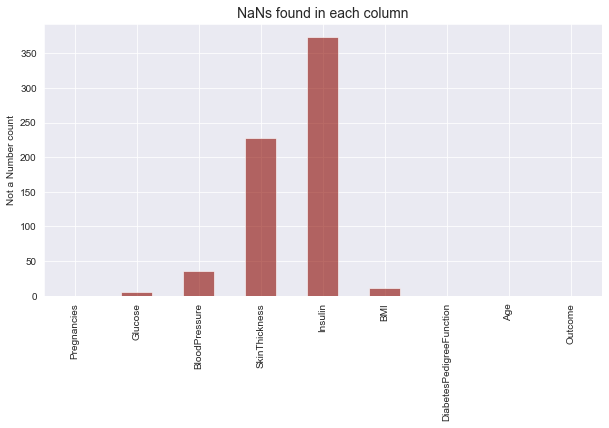

In [15]:
# Setting up the figure
plt.figure(figsize = (10,5))
sns.set_color_codes("dark")

# Plotting
df3.plot.bar(color = "r", alpha = 0.6)

# Setting up the title and axes label
plt.title("NaNs found in each column", fontsize = 14)
plt.ylabel("Not a Number count", fontsize = 10);

The Glucose, Blood Pressure, Skin Thickness, Insulin and BMI columns show the NaN values we replaced earlier.
Now, let's calculate the median for each of these columns grouped by the Outcome.

In [16]:
# Defining a function that will help us to calculate the median values for each column (var = input parameter), using groupby in Outcome
def finding_median(var):   
    df_median = df2[[var, "Outcome"]].groupby("Outcome").median()[var].reset_index()
    return df_median

In [17]:
# Dividing the dataframe into diabetic and healthy, in order to use in plotting
diabetic = df2[(df2['Outcome'] == 1)]
healthy = df2[(df2['Outcome'] == 0)]

In [18]:
# The function will receive the column (independent variable) and the bin size (column and bin_size = input parameters), plotting how the variable is distributed in the dataset.
# Combining a histogram with a kernel density estimate (KDE) for diabetic Outcome and for healthy Outcome in the same plot.
def plotting_distribution(column, bin_size) :  
    temp1 = diabetic[column]
    temp2 = healthy[column]

    sns.distplot(temp1, label = "Diabetic", color = "red", bins = bin_size)
    sns.distplot(temp2, label = "Healthy", color = "blue", bins = bin_size)
    plt.legend();

### Glucose

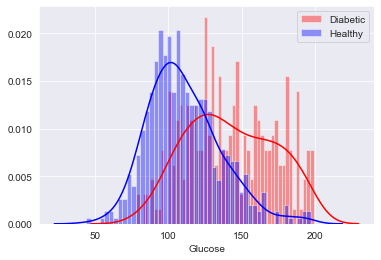

In [20]:
plotting_distribution("Glucose", 50);

In [21]:
finding_median("Glucose")

,Outcome,Glucose
0,0,107.0
1,1,140.0


After find the Glucose's Median for a healthy person (Outcome = 0) and for a diabetic person (Outcome = 1), now we can replace the NaN for the Median number, completing the dataset in order to find the final correlation.

In [22]:
df2.loc[(df2["Outcome"] == 0 ) & (df2["Glucose"].isnull()), "Glucose"] = 107
df2.loc[(df2["Outcome"] == 1 ) & (df2["Glucose"].isnull()), "Glucose"] = 140

In [23]:
# Checking the sum of the NaN values in each column
df3 = df2.isna().sum()
df3

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Glucose corrected.

### Blood Pressure

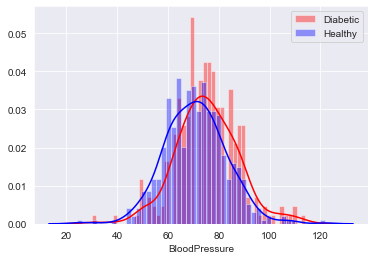

In [24]:
plotting_distribution("BloodPressure", 50);

In [25]:
finding_median("BloodPressure")

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [26]:
df2.loc[(df2["Outcome"] == 0 ) & (df2["BloodPressure"].isnull()), "BloodPressure"] = 70
df2.loc[(df2["Outcome"] == 1 ) & (df2["BloodPressure"].isnull()), "BloodPressure"] = 74.5

In [27]:
# Checking the sum of the NaN values in each column
df3 = df2.isna().sum()
df3

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Blood Pressure corrected.

### Skin Thickness

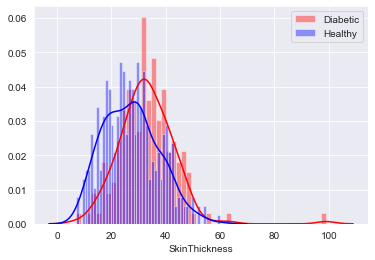

In [28]:
plotting_distribution("SkinThickness", 50)

In [29]:
finding_median("SkinThickness")

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [30]:
df2.loc[(df2["Outcome"] == 0 ) & (df2["SkinThickness"].isnull()), "SkinThickness"] = 27
df2.loc[(df2["Outcome"] == 1 ) & (df2["SkinThickness"].isnull()), "SkinThickness"] = 32

In [31]:
# Checking the sum of the NaN values in each column
df3 = df2.isna().sum()
df3

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Skin Thickness corrected.

### Insulin

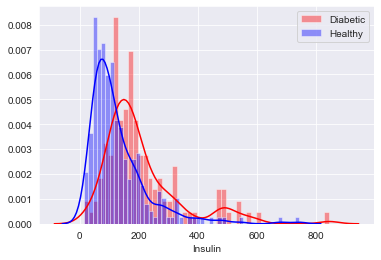

In [32]:
plotting_distribution("Insulin", 50);

In [33]:
finding_median("Insulin")

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [34]:
df2.loc[(df2["Outcome"] == 0 ) & (df2["Insulin"].isnull()), "Insulin"] = 102.5
df2.loc[(df2["Outcome"] == 1 ) & (df2["Insulin"].isnull()), "Insulin"] = 169.5

In [35]:
# Checking the sum of the NaN values in each column
df3 = df2.isna().sum()
df3

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

Insulin corrected.

### BMI

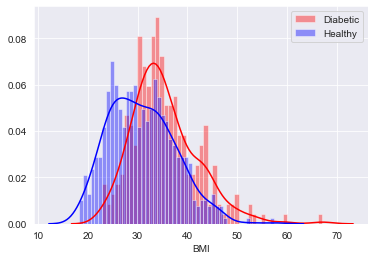

In [36]:
plotting_distribution("BMI", 50);

In [37]:
finding_median("BMI")

,Outcome,BMI
0,0,30.1
1,1,34.3


In [38]:
df2.loc[(df2["Outcome"] == 0 ) & (df2["BMI"].isnull()), "BMI"] = 30.1
df2.loc[(df2["Outcome"] == 1 ) & (df2["BMI"].isnull()), "BMI"] = 34.3

In [39]:
# Checking the sum of the NaN values in each column
df3 = df2.isna().sum()
df3

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

BMI corrected.

### Diabetes Pedigree Function

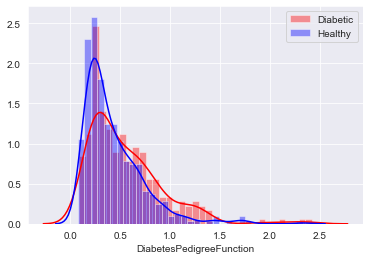

In [40]:
plotting_distribution("DiabetesPedigreeFunction", 35)

### Age

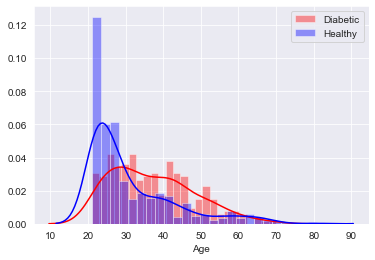

In [41]:
plotting_distribution("Age", 25)

### Pregnancies

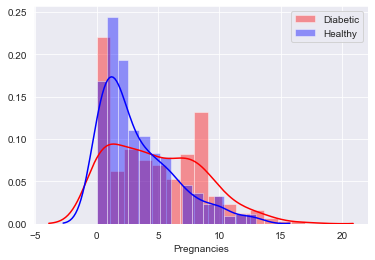

In [42]:
plotting_distribution("Pregnancies", 15)

In [43]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

In [44]:
(df2.Outcome.mean()) * 100

34.89583333333333

34.90% of all individuals in the dataset have diabetes.

In [45]:
# Counting of unique values in Outcome.
pima_resume = df2["Outcome"].value_counts()
pima_resume

0    500
1    268
Name: Outcome, dtype: int64

Let's see the pima_resume in bar plots.

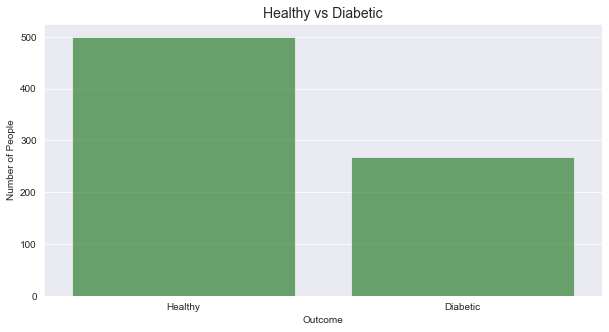

In [50]:
# Setting up the figure
plt.figure(figsize = (10,5))
sns.set_color_codes("dark")

# Plotting
ax = sns.countplot(data = df2, x = "Outcome", color = "green", alpha = 0.6)
outcome_text = ["Healthy", "Diabetic"]
ax.set_xticklabels(outcome_text)

# Setting up the title and axes label
plt.title("Healthy vs Diabetic", fontsize = 14)

plt.xlabel("Outcome", fontsize = 10)
plt.ylabel("Number of People", fontsize = 10);

### The mean values for a Healthy Pima person:

In [51]:
df2[df2["Outcome"] == 0].mean()

Pregnancies                   3.298000
Glucose                     110.622000
BloodPressure                70.844000
SkinThickness                27.170000
Insulin                     117.172000
BMI                          30.846000
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

We can see the average values of a Pima person who is healthy.

### The mean values for a Diabetic Pima person:

In [52]:
df2[df2["Outcome"] == 1].mean()

Pregnancies                   4.865672
Glucose                     142.302239
BloodPressure                75.272388
SkinThickness                32.671642
Insulin                     187.615672
BMI                          35.398507
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

We can see the average values of a Pima person who is diabetic.

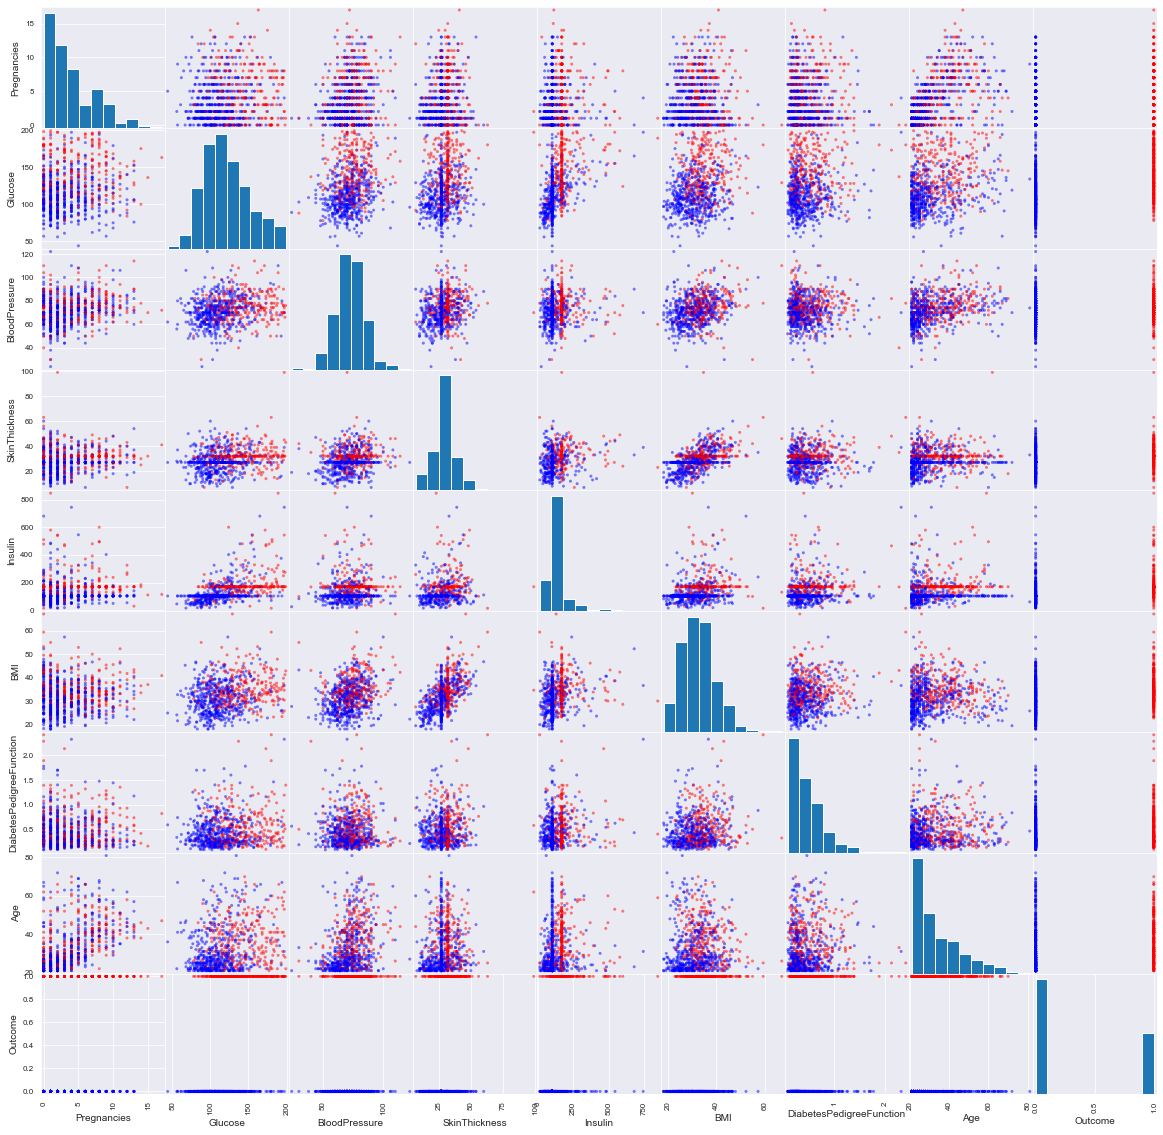

In [53]:
# Maping the Outcome colors. 
# Healthy = 0 = blue
# Diabetic = 1 = red
colors = df2["Outcome"].map(lambda x: "red" if x else "blue")

# Drawning a matrix of scatter plots using the colors maped earlier
pd.plotting.scatter_matrix(df2, figsize = (20,20), color = colors);

### Research Question 1 - Which predictor variable (Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age) has the strongest correlated with diabetes?

In [54]:
df2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


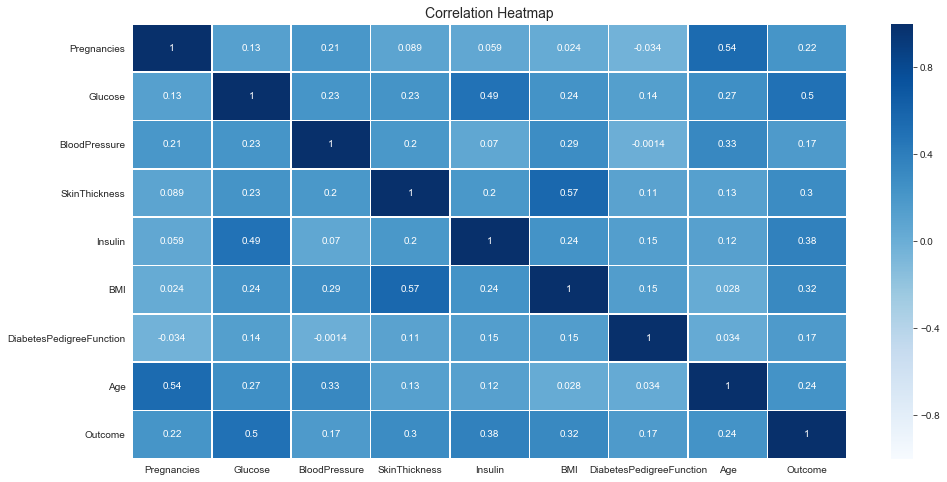

In [55]:
# Setting up the figure
plt.figure(figsize = (16,8))

# Plotting the Heatmap
sns.heatmap(df2.corr(), annot = True, cmap = "Blues", linewidths = .5, vmin = -1, vmax = 1)

# Setting up the title
plt.title("Correlation Heatmap", fontsize = 14);

**In Outcome line, we can see the strongest correlation with Glucose (0.5).**

- In the Pregnancies line, the Age (0.54) is the one with the higher correlation.
- The Glucose has the strongest correlation with the Outcome (0.5) and Insulin (0.49).
- The BloodPressure line shows the strongest correlation with the Age (0.33).
- The SkinThickness variable shows the higher correlation with BMI (0.57).
- Insulin shows the strongest correlation with Glucose (0.49).
- BMI has the strongest correlation with SkinThickness (0.57).
- DiabetesPedigreeFunction shows the strongest correlation with Outcome (0.17), BMI (0.15), Insulin (0.15).
- In the Age line, the Pregnancies (0.54) is the one with the higher correlation.

<a id='conclusions'></a>
## Conclusion

Of all the predictive variables analyzed in the dataset, Glucose has the strongest correlation (0.5) with the Diabetes.